In [1]:
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K
from keras.models import load_model


Using TensorFlow backend.


In [18]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    # [3,4] after normalize => [3/5,4/5]

    # K.epsilon()) = 10^-7, prevent from dividing by zero
    
    return x / ( K.sqrt(K.mean(K.square(x))) + K.epsilon() )



In [3]:
model = load_model('my_model.h5')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_46 (Batc (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 18, 18, 128)       147584    
__________

In [25]:
filter_index = 11
print('Processing filter %d' % filter_index)


layer_name = 'conv2d_88'

input_img = model.input
layer_output = model.get_layer(layer_name).output

loss = K.mean(layer_output[:, :, :, filter_index])

# return a list of gradient tensor
grads = K.gradients(loss, [input_img])[0]
grads = normalize(grads)

# function = K.function([input_img], [loss, grads])
function = K.function([input_img], [loss,grads,layer_output])


lr = 1.
img_width = 48
img_height = 48


# 128 +/- 10, 138 > value > 118
input_img_data = np.random.random((1, img_width, img_height, 1))
input_img_data = (input_img_data - 0.5) * 20 + 128

# we run gradient ascent for 20 steps
for i in range(100):
    
    print(' -------------------------------- %s --------------------------------' %i)
    
    loss_value, grads_value, layer_output = function([input_img_data])
#     loss_value, grads_value = function([input_img_data])

    print(grads_value.shape)
    print('input_img_data.shape',input_img_data.shape)
    print('layer_output.shape',layer_output.shape)
    print('type(layer_output)',type(layer_output),np.mean(layer_output[:, :, :, filter_index]))
#     print('input_img_data[0,0,0:2]',input_img_data[0,0,0:2])
#     print('grads_value[0,0,0:2]',grads_value[0,0,0:2])
    
    input_img_data = input_img_data + grads_value * lr
    
    print('_____after gradient acsent_____')
#     print('input_img_data',input_img_data[0,0,0:2])
    

    print('Current loss value:', loss_value)
    
    if loss_value <= 0.:
        # some filters get stuck to 0, we can skip them
        break
        



Processing filter 11
 -------------------------------- 0 --------------------------------
(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <class 'numpy.ndarray'> 5.272117
_____after gradient acsent_____
Current loss value: 5.272117
 -------------------------------- 1 --------------------------------
(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <class 'numpy.ndarray'> 7.364502
_____after gradient acsent_____
Current loss value: 7.3645005
 -------------------------------- 2 --------------------------------
(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <class 'numpy.ndarray'> 8.0022545
_____after gradient acsent_____
Current loss value: 8.002254
 -------------------------------- 3 --------------------------------
(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <cl

(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <class 'numpy.ndarray'> 15.886337
_____after gradient acsent_____
Current loss value: 15.886339
 -------------------------------- 33 --------------------------------
(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <class 'numpy.ndarray'> 16.005896
_____after gradient acsent_____
Current loss value: 16.005896
 -------------------------------- 34 --------------------------------
(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <class 'numpy.ndarray'> 16.210756
_____after gradient acsent_____
Current loss value: 16.210756
 -------------------------------- 35 --------------------------------
(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <class 'numpy.ndarray'> 16.375887
_____after gradient acsent_____
Current loss value: 

(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <class 'numpy.ndarray'> 21.143696
_____after gradient acsent_____
Current loss value: 21.143694
 -------------------------------- 69 --------------------------------
(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <class 'numpy.ndarray'> 21.279776
_____after gradient acsent_____
Current loss value: 21.279772
 -------------------------------- 70 --------------------------------
(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <class 'numpy.ndarray'> 21.42176
_____after gradient acsent_____
Current loss value: 21.421759
 -------------------------------- 71 --------------------------------
(1, 48, 48, 1)
input_img_data.shape (1, 48, 48, 1)
layer_output.shape (1, 7, 7, 256)
type(layer_output) <class 'numpy.ndarray'> 21.55204
_____after gradient acsent_____
Current loss value: 21

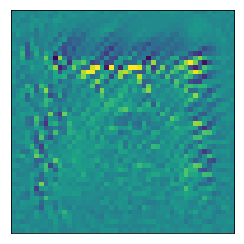

In [26]:
import matplotlib.pyplot as plt

img = deprocess_image(input_img_data[0,:,:,0])


plt.figure(figsize=(4, 20))
ax = plt.subplot(1, 1, 1)

plt.imshow(img)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()